#                                            Final Project

### Reduction of Hospital Readmission of Diabetic Patients within 30 days

In [1]:
import pandas as pd
import numpy as np

#### Reading data set into variable called 'data'

In [2]:
data =pd.read_csv("diabetic_data.csv")

In [3]:
data.keys()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
data.shape

(101766, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Numeric columns have no NULL values

#### Missing information is represented by '?' in few columns of dtype 'object'
#### Counting number of rows with missing information i.e., '?' in each column

In [7]:
for column in data.columns:
    if data[column].dtype == object:
        print(column,data[column][data[column]== '?'].count())    

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


#### Dropping columns 'encounter_id', 'patient_nbr' ,'payer_code' that are unnecessary for the model
#### Dropping columns 'weight','medical_specialty' whose values are '?' above  90% and 40% respectively 

In [8]:
data.drop(['encounter_id', 'patient_nbr', 'weight','medical_specialty', 'payer_code','admission_source_id' ], axis=1, inplace= True)

In [9]:
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

#### Removing 3 rows with gender values 'Unknown/Invalid'

In [10]:
data = data[data.gender != 'Unknown/Invalid']

#### Removing rows with discharge_disposition_id 11,19,20,21 which belong to category "Expired" and id 7 which is of patients that left against medical advice

In [11]:
data = data[(data.discharge_disposition_id != 11) & (data.discharge_disposition_id != 19) & (data.discharge_disposition_id != 20) & (data.discharge_disposition_id != 21) & (data.discharge_disposition_id != 7) ]

#### Removing rows with missing information in all 3 diagnosis

In [12]:
data = data[(data.diag_1 != '?') | (data.diag_2 != '?') | (data.diag_3 != '?')]

#### Dropping all columns related to medicines except insulin,metformin,glimepiride,repaglinide,pioglitazone,acarbose,glipizide, glyburide ,nateglinide (which is widely used diabetic medicine) as there is a column "diabetesMed" which tells if a patient is using diabetes medicine or not

In [13]:
data.drop(['chlorpropamide','acetohexamide', 'tolbutamide', 'rosiglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'],axis=1, inplace= True)

##### Dropping columns diag_1, diag_2, diag_3 because insufficiet information

In [14]:
data.drop(['diag_1','diag_2','diag_3'], axis=1, inplace= True)

In [15]:
data.race.value_counts()

Caucasian          74418
AfricanAmerican    18744
?                   2225
Hispanic            2001
Other               1471
Asian                628
Name: race, dtype: int64

#### Replacing '?' with NA and considering NA as a category

In [16]:
data["Race"]= data["race"].map(lambda x:'NA' if x=='?' else x)
data.drop(['race'], axis=1, inplace= True)

#### admission_type_ids 1,2,7 are grouped as Non-Elective category 3,4 as Elective category and other ids which fall under missing information are grouped as 'NA'

In [17]:
def get_fn(row):
    if row['admission_type_id']==1 or row['admission_type_id']==2 or row['admission_type_id']==7 :
        return "Non ELective"
    elif row['admission_type_id']==3 or row['admission_type_id']==4:
        return "Elective"
    else :
        return "NA"
data['admission_type']= data.apply(get_fn,axis=1)
data.drop(['admission_type_id'], axis=1, inplace= True)

In [18]:
data.readmitted.value_counts()

NO     52896
>30    35324
<30    11267
Name: readmitted, dtype: int64

#### Our target is to reduce readmission <30. So considering >30 and NO as 0 and <30 as 1

In [19]:
def fn(x):
    if x =='NO' or x=='>30':
        return 0
    else :
        return 1
data['readmit']= data['readmitted'].map(fn)
data.drop(['readmitted'], axis=1, inplace= True)

In [20]:
data['A1Cresult'].value_counts()

None    82781
>8       8056
Norm     4894
>7       3756
Name: A1Cresult, dtype: int64

#### 'None' & 'Norm' of A1C is 0 and >8,>7 is 1

In [21]:
def fun(z):
    if z =='None' or z=='Norm':
        return 1
    else :
        return 0
data['A1C']= data['A1Cresult'].map(fun)
data.drop(['A1Cresult'], axis=1, inplace= True)

#### Dividing age groups in to three categories 'young','mid','old'

In [22]:
def gt_ag(a):
    if a =='[0-10)' or a=='[10-20)' or a=='[20-30)':
        return 'young'
    elif a =='[30-40)' or a=='[40-50)' or a=='[50-60)':
        return 'mid'
    else:
        return'old'
data['Age']= data['age'].map(gt_ag)
data.drop(['age'], axis=1, inplace= True)

In [23]:
data['max_glu_serum'].value_counts()

None    94304
Norm     2553
>200     1431
>300     1199
Name: max_glu_serum, dtype: int64

#### 'None' & 'Norm' of max_glu_serum is 0 and >200,>300 is 1

In [24]:
data['max_glu_serum']=data['max_glu_serum'].replace('None',0)
data['max_glu_serum']=data['max_glu_serum'].replace('Norm',0)
data['max_glu_serum']=data['max_glu_serum'].replace('>200',1)
data['max_glu_serum']=data['max_glu_serum'].replace('>300',1)

#### Dividing discharge_disposition_id to three values "Discharged Home", "NA", "Discharged/Transferred"

In [25]:
def dp_id(a):
    if a ==6 or a==8 or a==9 or a==13 or a==1:
        return 'Discharged Home'
    elif a==18 or a ==25 or a==26 :
        return 'NA'
    else:
        return'Discharged/Transferred'
data['discharge']= data['discharge_disposition_id'].map(dp_id)
data.drop(['discharge_disposition_id'], axis=1, inplace= True)

# Visualizations

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Plotting count of target variable 'readmit'

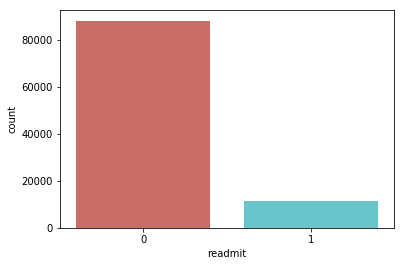

In [27]:
sns.countplot(x='readmit',data=data, palette='hls')
plt.savefig('admit-readmit')
plt.show()

In [28]:
count_0 =len(data[data['readmit']==0])
count_1 = len(data['readmit'])-count_0
prctg_0 = count_0/len(data['readmit'])
prctg_1 = count_1/len(data['readmit'])
print("percentage of readmission", prctg_1*100)
print("percentage of no readmission", prctg_0*100)

percentage of readmission 11.325097751465016
percentage of no readmission 88.67490224853498


#### There no balance in the ratio of values of target variable 'readmit'

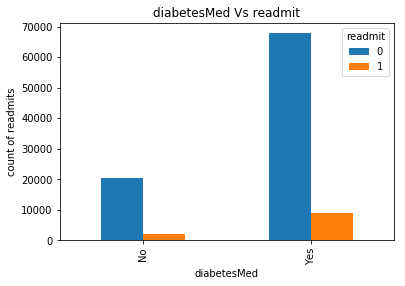

In [29]:
pd.crosstab(data.diabetesMed,data.readmit).plot(kind='bar')
plt.title('diabetesMed Vs readmit')
plt.xlabel('diabetesMed')
plt.ylabel('count of readmits')
plt.savefig('diabetesMed vs readmit')

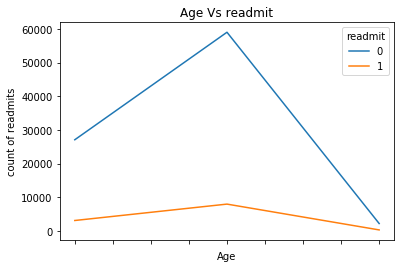

In [30]:
pd.crosstab(data.Age,data.readmit).plot(kind='line')
plt.title('Age Vs readmit')
plt.xlabel('Age')
plt.ylabel('count of readmits')
plt.savefig('Age vs readmit')

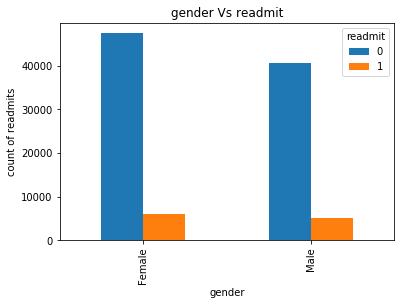

In [31]:
pd.crosstab(data.gender,data.readmit).plot(kind='bar')
plt.title('gender Vs readmit')
plt.xlabel('gender')
plt.ylabel('count of readmits')
plt.savefig('gender vs readmit')

#### Gender doesn't seem to add much value to readmission rate

#### There might be more chance for patients under diabetes medication to readmit than those who are not uder medication

#### Creating dummy encoded columns for categorical vaiables
#### To avoid dummy variable trap i.e., scenario of highly correlated independent variables we have to drop one of the created dummy variable. The Original column should also be dropped as we have dummies

In [32]:
dummy_metformin = pd.get_dummies(data['metformin'], prefix='metformin')
data= data.join(dummy_metformin.drop("metformin_No", axis=1))
data.drop(['metformin'], axis=1, inplace= True)

In [33]:
dummy_repaglinide = pd.get_dummies(data['repaglinide'], prefix='repaglinide')
data= data.join(dummy_repaglinide.drop("repaglinide_No", axis=1))
data.drop(['repaglinide'], axis=1, inplace= True)

In [34]:
dummy_insulin = pd.get_dummies(data['insulin'], prefix='insulin')
data= data.join(dummy_insulin.drop("insulin_No", axis=1))
data.drop(['insulin'], axis=1, inplace= True)

In [35]:
dummy_nateglinide = pd.get_dummies(data['nateglinide'], prefix='nateglinide')
data= data.join(dummy_nateglinide.drop("nateglinide_No", axis=1))
data.drop(['nateglinide'], axis=1, inplace= True)

In [36]:
dummy_glimepiride = pd.get_dummies(data['glimepiride'], prefix='glimepiride')
data= data.join(dummy_glimepiride.drop("glimepiride_No", axis=1))
data.drop(['glimepiride'], axis=1, inplace= True)

In [37]:
dummy_glipizide = pd.get_dummies(data['glipizide'], prefix='glipizide')
data= data.join(dummy_glipizide.drop("glipizide_No", axis=1))
data.drop(['glipizide'], axis=1, inplace= True)

In [38]:
dummy_glyburide = pd.get_dummies(data['glyburide'], prefix='glyburide')
data= data.join(dummy_glyburide.drop("glyburide_No", axis=1))
data.drop(['glyburide'], axis=1, inplace= True)

In [39]:
dummy_pioglitazone = pd.get_dummies(data['pioglitazone'], prefix='pioglitazone')
data= data.join(dummy_pioglitazone.drop("pioglitazone_No", axis=1))
data.drop(['pioglitazone'], axis=1, inplace= True)

In [40]:
dummy_acarbose = pd.get_dummies(data['acarbose'], prefix='acarbose')
data= data.join(dummy_acarbose.drop("acarbose_No", axis=1))
data.drop(['acarbose'], axis=1, inplace= True)

In [41]:
dummy_gender = pd.get_dummies(data['gender'], prefix='gender')
data= data.join(dummy_gender.drop("gender_Female", axis=1))
data.drop(['gender'], axis=1, inplace= True)

In [42]:
dummy_admission = pd.get_dummies(data['admission_type'], prefix='admission')
data= data.join(dummy_admission.drop("admission_NA", axis=1))
data.drop(['admission_type'], axis=1, inplace= True)

In [43]:
dummy_change = pd.get_dummies(data['change'], prefix='change')
data= data.join(dummy_change.drop("change_Ch", axis=1))
data.drop(['change'], axis=1, inplace= True)

In [44]:
dummy_Age = pd.get_dummies(data['Age'], prefix='Age')
data= data.join(dummy_Age.drop("Age_mid", axis=1))
data.drop(['Age'], axis=1, inplace= True)

In [45]:
dummy_diabetesMed = pd.get_dummies(data['diabetesMed'], prefix='diabetesMed')
data= data.join(dummy_diabetesMed.drop("diabetesMed_No", axis=1))
data.drop(['diabetesMed'], axis=1, inplace= True)

In [46]:
dummy_race = pd.get_dummies(data['Race'], prefix='Race')
data= data.join(dummy_race.drop("Race_Other", axis=1))
data.drop(['Race'], axis=1, inplace= True)

In [47]:
data.discharge.value_counts()

Discharged Home           73661
Discharged/Transferred    21146
NA                         4680
Name: discharge, dtype: int64

In [48]:
dummy_discharge = pd.get_dummies(data['discharge'], prefix='discharge')
data= data.join(dummy_discharge.drop("discharge_NA", axis=1))
data.drop(['discharge'], axis=1, inplace= True)

# Logistic Regression Model

In [49]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#### Splitting the data set into Test and Train data¶

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('readmit', axis=1), data['readmit'], test_size=0.2, random_state=12)

#### Adding constant to Train data

In [51]:
X_train = sm.add_constant(X_train)

In [52]:
X_test.shape

(19898, 51)

In [53]:
X_train.shape

(79589, 52)

#### Fitting Logistic Regression Model to data

In [54]:
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                            Results: Generalized linear model
Model:                       GLM                      AIC:                    54001.8256  
Link Function:               logit                    BIC:                    -843647.8839
Dependent Variable:          readmit                  Log-Likelihood:         -26949.     
Date:                        2018-11-23 13:56         LL-Null:                -28156.     
No. Observations:            79589                    Deviance:               53898.      
Df Model:                    51                       Pearson chi2:           7.83e+04    
Df Residuals:                79537                    Scale:                  1.0000      
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                  Coef.   Std.Err.     z     P>|z|     [0.025     0.975]  
----------------------------

#### STEP WISE REGRESSION - Back ward Elimination

#### Step wise removal of variables that are not significant i.e., in our case variables with P > 0.05

In [55]:
X_train.drop(['glyburide_Up','glyburide_Down','glyburide_Steady'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                            Results: Generalized linear model
Model:                       GLM                      AIC:                    53998.1584  
Link Function:               logit                    BIC:                    -843679.4049
Dependent Variable:          readmit                  Log-Likelihood:         -26950.     
Date:                        2018-11-23 13:57         LL-Null:                -28156.     
No. Observations:            79589                    Deviance:               53900.      
Df Model:                    48                       Pearson chi2:           7.83e+04    
Df Residuals:                79540                    Scale:                  1.0000      
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                  Coef.   Std.Err.     z     P>|z|     [0.025     0.975]  
----------------------------

In [56]:
X_train.drop(['acarbose_Down','acarbose_Steady','acarbose_Up'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53998.6267  
Link Function:            logit                 BIC:                 -843706.7906
Dependent Variable:       readmit               Log-Likelihood:      -26953.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53907.      
Df Model:                 45                    Pearson chi2:        7.83e+04    
Df Residuals:             79543                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0455

In [57]:
X_train.drop(['nateglinide_Down','nateglinide_Steady','nateglinide_Up'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53995.0810  
Link Function:            logit                 BIC:                 -843738.1902
Dependent Variable:       readmit               Log-Likelihood:      -26955.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53909.      
Df Model:                 42                    Pearson chi2:        7.83e+04    
Df Residuals:             79546                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0445

In [58]:
X_train.drop(['number_outpatient'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53993.0905  
Link Function:            logit                 BIC:                 -843749.4653
Dependent Variable:       readmit               Log-Likelihood:      -26955.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53909.      
Df Model:                 41                    Pearson chi2:        7.83e+04    
Df Residuals:             79547                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0444

In [59]:
X_train.drop(['Age_young'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53991.1189  
Link Function:            logit                 BIC:                 -843760.7216
Dependent Variable:       readmit               Log-Likelihood:      -26955.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53909.      
Df Model:                 40                    Pearson chi2:        7.83e+04    
Df Residuals:             79548                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0423

In [60]:
X_train.drop(['glimepiride_Up','glimepiride_Down'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53987.5201  
Link Function:            logit                 BIC:                 -843782.8896
Dependent Variable:       readmit               Log-Likelihood:      -26955.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53910.      
Df Model:                 38                    Pearson chi2:        7.83e+04    
Df Residuals:             79550                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0411

In [61]:
X_train.drop(['pioglitazone_Up','pioglitazone_Steady','pioglitazone_Down'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53984.3273  
Link Function:            logit                 BIC:                 -843813.9363
Dependent Variable:       readmit               Log-Likelihood:      -26956.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53912.      
Df Model:                 35                    Pearson chi2:        7.83e+04    
Df Residuals:             79553                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0491

In [62]:
X_train.drop(['glipizide_Steady','glipizide_Up'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53980.7869  
Link Function:            logit                 BIC:                 -843836.0459
Dependent Variable:       readmit               Log-Likelihood:      -26956.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53913.      
Df Model:                 33                    Pearson chi2:        7.83e+04    
Df Residuals:             79555                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -3.0440

In [63]:
X_train.drop(['Race_AfricanAmerican','Race_Asian','Race_Caucasian','Race_Hispanic','Race_NA'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53977.5564  
Link Function:            logit                 BIC:                 -843885.6996
Dependent Variable:       readmit               Log-Likelihood:      -26960.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53920.      
Df Model:                 28                    Pearson chi2:        7.83e+04    
Df Residuals:             79560                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.9184

In [64]:
X_train.drop(['insulin_Steady','insulin_Up'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53975.1688  
Link Function:            logit                 BIC:                 -843906.6565
Dependent Variable:       readmit               Log-Likelihood:      -26961.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53921.      
Df Model:                 26                    Pearson chi2:        7.83e+04    
Df Residuals:             79562                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8996

In [65]:
X_train.drop(['change_No'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53973.6777  
Link Function:            logit                 BIC:                 -843917.4322
Dependent Variable:       readmit               Log-Likelihood:      -26961.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53922.      
Df Model:                 25                    Pearson chi2:        7.83e+04    
Df Residuals:             79563                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8760

In [66]:
X_train.drop(['admission_Elective','admission_Non ELective'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53971.5175  
Link Function:            logit                 BIC:                 -843938.1617
Dependent Variable:       readmit               Log-Likelihood:      -26962.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53924.      
Df Model:                 23                    Pearson chi2:        7.83e+04    
Df Residuals:             79565                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8334

In [67]:
X_train.drop(['repaglinide_Down','repaglinide_Up','repaglinide_Steady'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53969.4798  
Link Function:            logit                 BIC:                 -843968.0533
Dependent Variable:       readmit               Log-Likelihood:      -26964.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53927.      
Df Model:                 20                    Pearson chi2:        7.83e+04    
Df Residuals:             79568                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8322

In [68]:
X_train.drop(['metformin_Down'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53968.2251  
Link Function:            logit                 BIC:                 -843978.5926
Dependent Variable:       readmit               Log-Likelihood:      -26964.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53928.      
Df Model:                 19                    Pearson chi2:        7.83e+04    
Df Residuals:             79569                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8313

In [69]:
X_train.drop(['max_glu_serum'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53966.7071  
Link Function:            logit                 BIC:                 -843989.3952
Dependent Variable:       readmit               Log-Likelihood:      -26964.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53929.      
Df Model:                 18                    Pearson chi2:        7.83e+04    
Df Residuals:             79570                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8266

In [70]:
X_train.drop(['gender_Male'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53967.9590  
Link Function:            logit                 BIC:                 -843997.4280
Dependent Variable:       readmit               Log-Likelihood:      -26966.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53932.      
Df Model:                 17                    Pearson chi2:        7.83e+04    
Df Residuals:             79571                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8071

In [71]:
X_train.drop(['num_procedures'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53967.4551  
Link Function:            logit                 BIC:                 -844007.2164
Dependent Variable:       readmit               Log-Likelihood:      -26967.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53933.      
Df Model:                 16                    Pearson chi2:        7.83e+04    
Df Residuals:             79572                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8124

In [72]:
X_train.drop(['time_in_hospital'], axis=1, inplace=True)
model= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
print(model.summary2())

                        Results: Generalized linear model
Model:                    GLM                   AIC:                 53967.3957  
Link Function:            logit                 BIC:                 -844016.5605
Dependent Variable:       readmit               Log-Likelihood:      -26968.     
Date:                     2018-11-23 13:57      LL-Null:             -28156.     
No. Observations:         79589                 Deviance:            53935.      
Df Model:                 15                    Pearson chi2:        7.83e+04    
Df Residuals:             79573                 Scale:               1.0000      
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -2.8068

#### Now all the variables are significant and also we observe that deviance and aic are improved. This is considered as Final model

#### Testing the accuracy of the model using test data set

In [73]:
X_test = sm.add_constant(X_test[['num_lab_procedures','num_medications','number_emergency','number_inpatient','number_diagnoses','A1C','metformin_Steady','metformin_Up','insulin_Down','glimepiride_Steady','glipizide_Down','Age_old','diabetesMed_Yes','discharge_Discharged Home','discharge_Discharged/Transferred']])

In [74]:
probabilities = model.predict(X_test)

In [75]:
probabilities.head()

12187     0.096891
100577    0.077404
77206     0.105490
68100     0.126157
92827     0.137303
dtype: float64

#### Setting a cutoff probability of 0.1 to make predictions if the passenger survived or not on the test data set.


In [76]:
predicted_classes = probabilities.map(lambda x: 1 if x > 0.1 else 0)

In [77]:
predicted_classes.head()

12187     0
100577    0
77206     1
68100     1
92827     1
dtype: int64

In [78]:
accuracy = sum(predicted_classes == Y_test) / len(Y_test)
accuracy

0.5915167353502865

#### Plotting an ROC curve and confusion matrix

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [80]:
confusion_mat = confusion_matrix(Y_test, predicted_classes)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,10336,7328
Actual 1,800,1434


#### Though the accuracy of model is less, It is predicting 1's that is readmissions more accurate than no readmissions

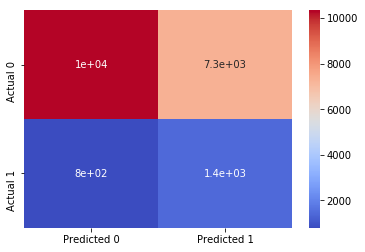

In [81]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [82]:
probs = model.predict(X_test)

In [83]:
auc = roc_auc_score(Y_test, probs)
print('AUC',auc)

AUC 0.65103089664182


In [84]:
fpr, tpr, threshold = roc_curve(Y_test, probs)

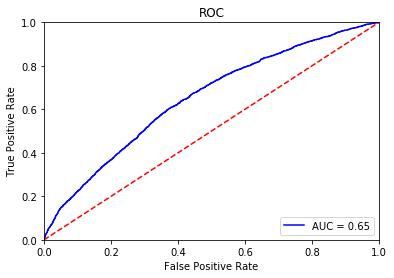

In [85]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC')
plt.show()

#### precision_score, recall_score, f1_score

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [87]:
precision_score(Y_test, predicted_classes)

0.16366126455147226

In [88]:
recall_score(Y_test, predicted_classes)

0.6418979409131602

In [89]:
f1_score(Y_test, predicted_classes)

0.26082211713350306

#### finding optimal cutoff probability

In [90]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [91]:
optimal_threshold

0.10541454937083286

In [92]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [93]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions)
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
new_confusion_df

,Predicted 0,Predicted 1
Actual 0,11063,6601
Actual 1,885,1349


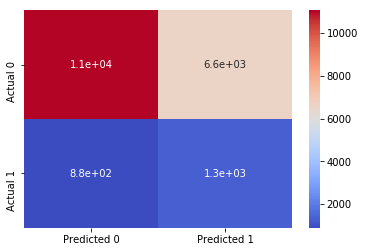

In [94]:
_=sns.heatmap(new_confusion_df, cmap='coolwarm', annot=True)

#### New accuracy, precision_scor,recall_score,f1_score

In [95]:
accuracy = sum(new_predictions == Y_test) / len(Y_test)
accuracy

0.6237812845512112

In [96]:
precision_score(Y_test, new_predictions)

0.16968553459119498

In [97]:
recall_score(Y_test, new_predictions)

0.6038495971351835

In [98]:
f1_score(Y_test, new_predictions)

0.2649253731343284

# Random Forest Model

In [99]:
from sklearn.ensemble import RandomForestClassifier

#### Fitting Radom Forest model to data

In [100]:
rf_model = RandomForestClassifier(n_estimators=10,max_depth=25,min_samples_split=3)

In [101]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting and evaluating the model

In [102]:
predictions = rf_model.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(Y_test, predictions)

0.8764699969846216

In [105]:
precision_score(Y_test, predictions)

0.211340206185567

In [106]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'],\
                            columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,17358,306
Actual 1,2152,82


#### Plotting important features and their level of importance

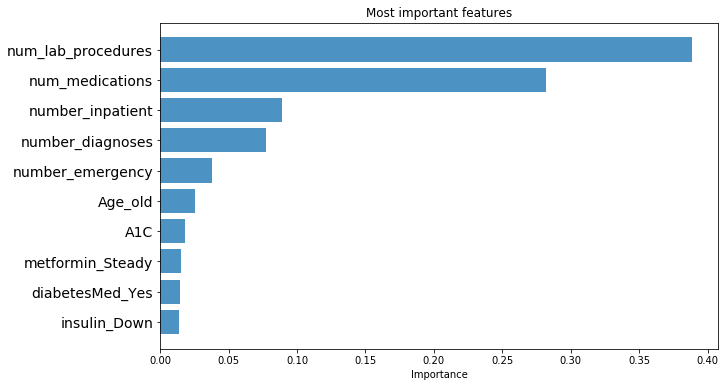

In [107]:
feature_list = X_train.columns
features = rf_model.feature_importances_
most_imp = pd.DataFrame([a for a in zip(feature_list,features)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp)), most_imp.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp)), most_imp.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features')
plt.savefig('Most imp')
plt.show()